# title

## runtime-breakdown

### original h1


In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import math
import seaborn as sns
sns.set(style="darkgrid")

In [245]:
dir_path = os.path.abspath('')

with open(dir_path+"/vrf-runtime-breakdown/stat.csv") as breakdown_file: 
    lines = breakdown_file.readlines()

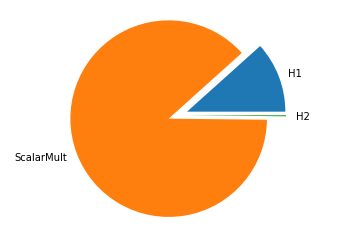

In [246]:
labels = []
sizes = []
explode = []
for i in range(len(lines)):
    if lines[i].startswith("name,time/op"):
        for j in range(1, 4):
            data = lines[i+j].split(",")
            labels.append(data[0][:-3])
            sizes.append(data[1])
            explode.append(0.1)

plt.pie(sizes, labels=labels, explode=explode)
plt.axis('equal')
plt.show()

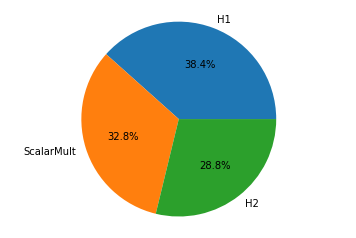

In [247]:
labels = []
sizes = []
for i in range(len(lines)):
    if lines[i].startswith("name,alloc/op"):
        for j in range(1, 4):
            data = lines[i+j].split(",")
            labels.append(data[0][:-3])
            sizes.append(data[1])
            explode.append(0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

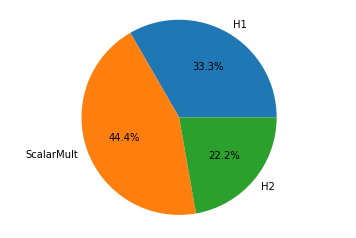

In [248]:
labels = []
sizes = []
for i in range(len(lines)):
    if lines[i].startswith("name,allocs/op"):
        for j in range(1, 4):
            data = lines[i+j].split(",")
            labels.append(data[0][:-3])
            sizes.append(data[1])
            explode.append(0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## runtime-comparison

In [249]:
with open(dir_path+"/runtime-comparison/stat.csv") as comparison_file: 
    lines = comparison_file.readlines()

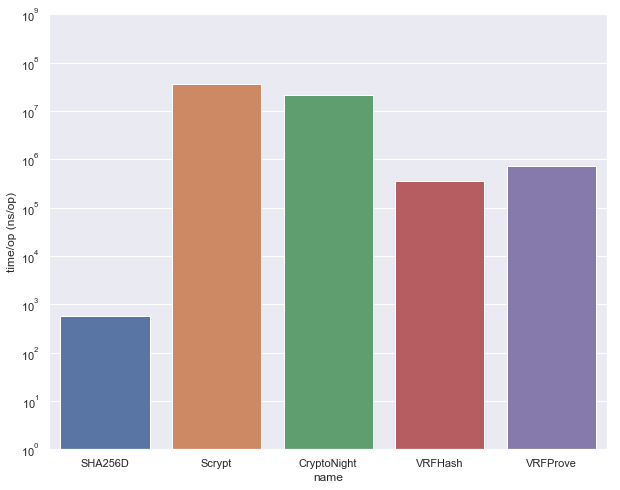

In [79]:
df = pd.read_csv(dir_path+"/runtime-comparison/stat.csv")
runtime_df = df.head(5)

for _, row in runtime_df.iterrows():
    row['name'] = row['name'][:-3]
    if row['name'] == 'Compute':
        row['name'] = 'VRFHash'
    if row['name'] == 'Prove':
        row['name'] = 'VRFProve'
    
xs = runtime_df['name']
ys = runtime_df['time/op (ns/op)'].astype('float64')

plt.figure(figsize=(10,8))
g=sns.barplot(xs, ys)
plt.yscale('log')
plt.ylim([1, 10**9])

plt.savefig('../../paper/figs/runtime-comparison.eps')

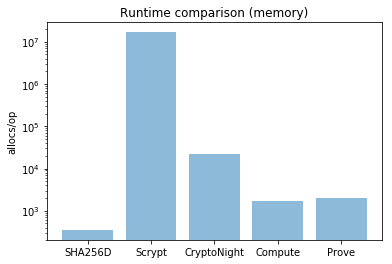

In [251]:
algos = []
performances = []
for i in range(len(lines)):
    if lines[i].startswith("name,alloc/op"):
        for j in range(1, 6):
            data = lines[i+j].split(",")
            algos.append(data[0][:-3])
            performances.append(float(data[1]))

index = np.arange(len(algos))
plt.bar(index, performances, align='center', alpha=0.5)
plt.xticks(index, algos)
plt.yscale("log")
plt.ylabel('allocs/op')
plt.title('Runtime comparison (memory)')

plt.show()

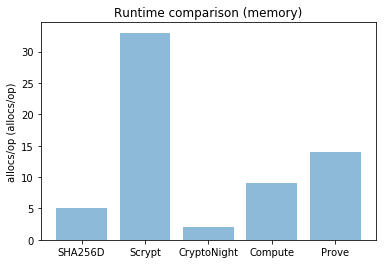

In [252]:
algos = []
performances = []
for i in range(len(lines)):
    if lines[i].startswith("name,allocs/op"):
        for j in range(1, 6):
            data = lines[i+j].split(",")
            algos.append(data[0][:-3])
            performances.append(float(data[1]))

index = np.arange(len(algos))
plt.bar(index, performances, align='center', alpha=0.5)
plt.xticks(index, algos)
plt.ylabel('allocs/op (allocs/op)')
plt.title('Runtime comparison (memory)')

plt.show()